
### MDA512 Data Science - Assignment 2
### Airline Passenger Satisfaction Analysis


In [1]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.utils.class_weight import compute_class_weight

# Splitting and cross-validation
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV,
    StratifiedKFold, KFold, ShuffleSplit
)
# Handling class imbalance
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler



In [3]:
# Load the dataset
df = pd.read_csv('test.csv')

# Checking general info about df

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
print(f'Data frame has {df.shape[0]} rows and {df.shape[1]} columns')

Data frame has 25976 rows and 25 columns


In [6]:
# Check data types and missing values
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [7]:
# Check summary statistics

df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


# Data preparation

In [8]:
# Missing values

In [9]:
# Check for missing values
df.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [10]:
df_clean = df.copy()  


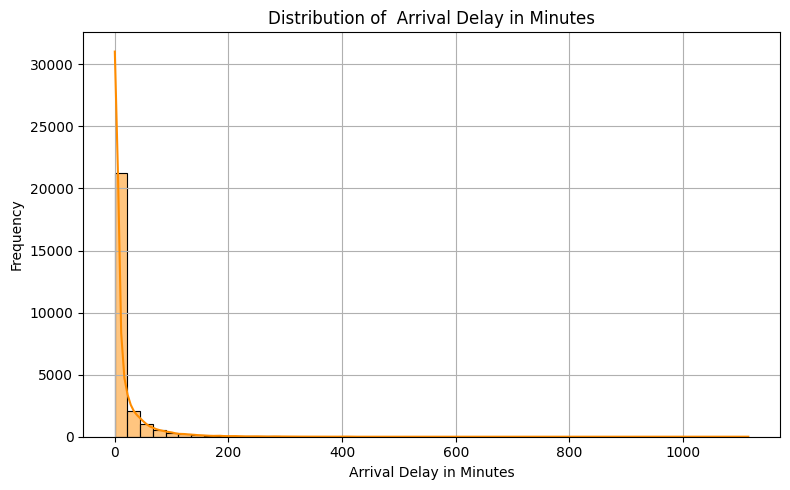

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clean["Arrival Delay in Minutes"], bins=50, kde=True, color='darkorange')
plt.title("Distribution of  Arrival Delay in Minutes")
plt.xlabel("Arrival Delay in Minutes")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('Distribution of  Arrival Delay in Minutes.png')
plt.close()

In [12]:
# As we can see non-simmetrical distribution it would better to replace all the NA values with median value

In [13]:
median_value = df["Arrival Delay in Minutes"].median()
df["Arrival Delay in Minutes"].fillna(median_value, inplace=True)

C:\Users\kopsu\AppData\Local\Temp\ipykernel_21260\2287937306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Arrival Delay in Minutes"].fillna(median_value, inplace=True)


In [14]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [15]:
# Checking duplicates

In [16]:

duplicate_rows = df_clean[df_clean.duplicated()]

num_duplicates = duplicate_rows.shape[0]
print(f"There ara {num_duplicates} duplicates.")


There ara 0 duplicates.


In [17]:
# removing meaninless values
# Unnamed and id columns don't influence on the satisfaction, so we can remove them

In [18]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)


In [19]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


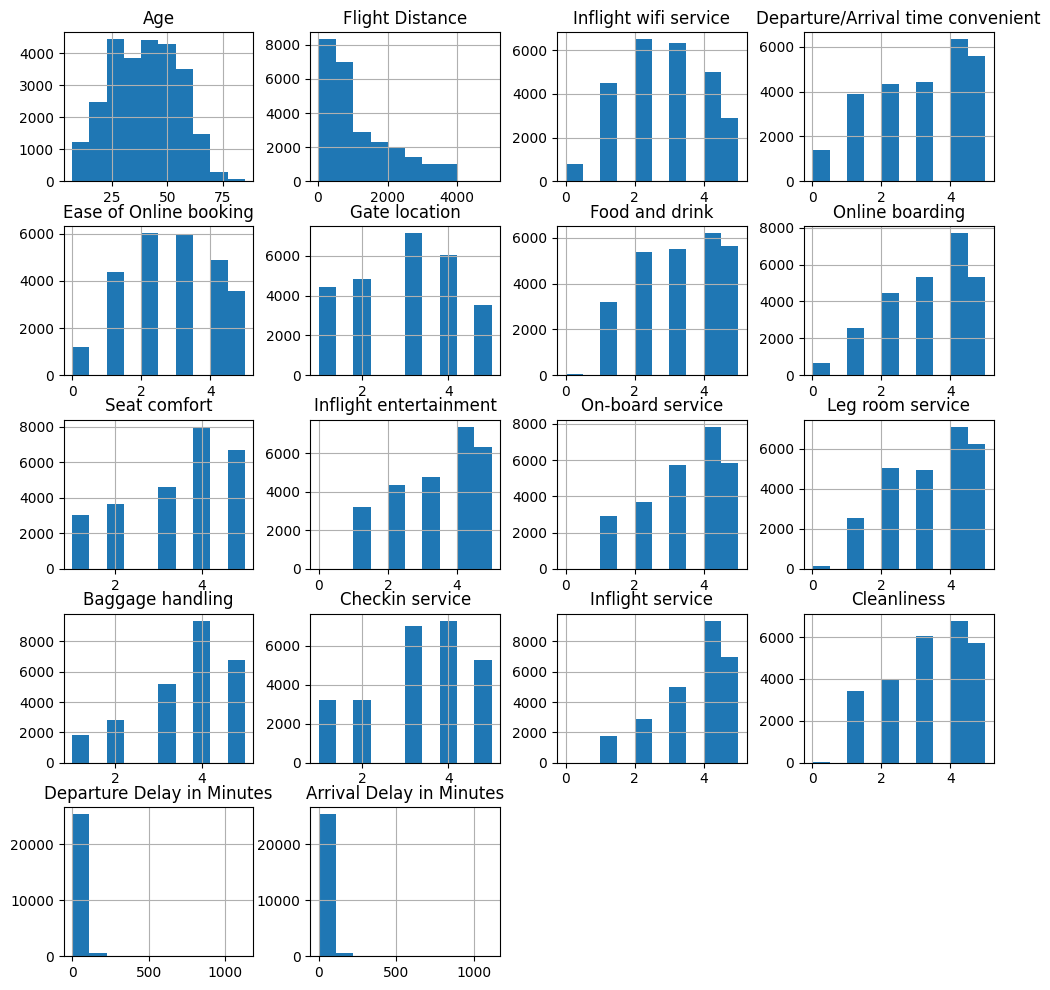

In [20]:
df.hist(figsize=(12,12))
plt.show()
plt.savefig('Feature Distribution Histograms.png')
plt.close()

In [21]:
df.dtypes


Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [22]:
df.Gender.value_counts()

Gender
Female    13172
Male      12804
Name: count, dtype: int64

In [23]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: count, dtype: int64

In [24]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    18038
Personal Travel     7938
Name: count, dtype: int64

In [25]:
df['Class'].value_counts()

Class
Business    12495
Eco         11564
Eco Plus     1917
Name: count, dtype: int64

In [26]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64

# Tackling categorical data
# There are 4 categorical features in the dataframe: Gender, Customer Type, Type of travel, Class. Only class has 3 options, so it is possible to use mapping for first 3 variables and One-Hot encoding for Class. Also - satisfaction also was converted from object to int

In [27]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Customer Type'] = df['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer': 1})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
# One-hot ащк 'Class'
df = pd.get_dummies(df, columns=['Class'], drop_first=True)

In [28]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus
0,1,1,52,1,160,5,4,3,4,3,...,5,5,2,5,5,50,44.0,1,True,False
1,1,1,36,1,2863,1,1,3,1,5,...,4,4,3,4,5,0,0.0,1,False,False
2,0,0,20,1,192,2,0,2,4,2,...,1,3,2,2,2,0,0.0,0,True,False
3,0,1,44,1,3377,0,0,0,2,3,...,1,1,3,1,4,0,6.0,1,False,False
4,1,1,49,1,1182,2,3,4,3,4,...,2,2,4,2,4,0,20.0,1,True,False


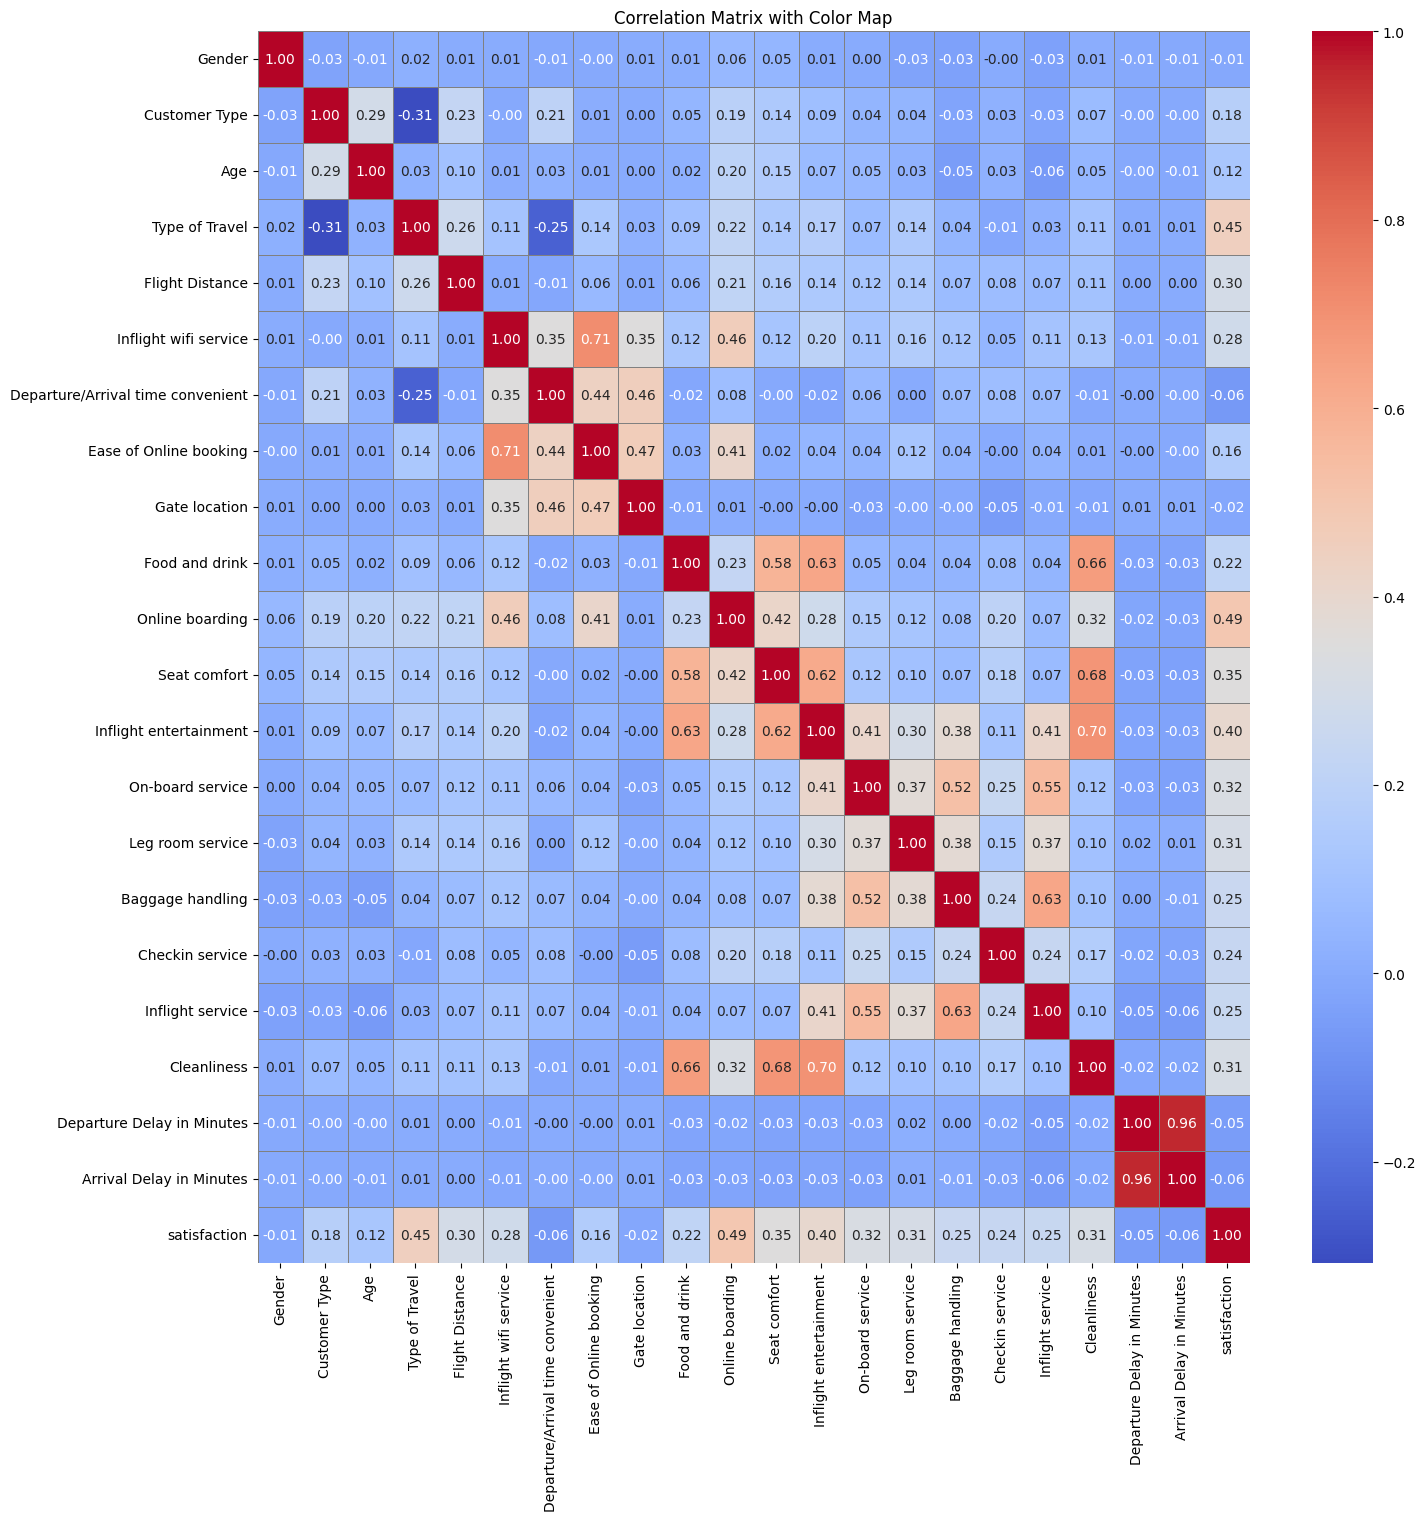

In [29]:
corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title('Correlation Matrix with Color Map')
plt.show()
plt.savefig('Correlation Matrix Heatmap.png')
plt.close()

In [30]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus
0,1,1,52,1,160,5,4,3,4,3,...,5,5,2,5,5,50,44.0,1,True,False
1,1,1,36,1,2863,1,1,3,1,5,...,4,4,3,4,5,0,0.0,1,False,False
2,0,0,20,1,192,2,0,2,4,2,...,1,3,2,2,2,0,0.0,0,True,False
3,0,1,44,1,3377,0,0,0,2,3,...,1,1,3,1,4,0,6.0,1,False,False
4,1,1,49,1,1182,2,3,4,3,4,...,2,2,4,2,4,0,20.0,1,True,False


# As we can see in correlation matrix some features with high correlation with each other, also some features with outliers an non-gausian distribution, it would better to use Random Forest for choosing the best parameters as this method is resistant to multicolleniarity and outliers. Also we can no to do scalisation as Random Forest works with trashholdes rather than distances.

# Random Forest for choosing best parameters

In [31]:
# 1. Separate features and target variable
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# 2. Convert boolean features to integers
X = X.astype({col: int for col in X.select_dtypes(include='bool').columns})

# 3. Train Random Forest on the FULL dataset
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# 4. Evaluate feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# 5. Calculate cumulative importance and select features up to 90%
cumulative_importance = importances_sorted.cumsum()
selected_features = cumulative_importance[cumulative_importance <= 0.90].index.tolist()

# 6. Display selected features
print("Best features (up to 90% cumulative importance):")
print(selected_features)

# 7. Create X_filtered with only the top features
X_filtered = X[selected_features]


Best features (up to 90% cumulative importance):
['Online boarding', 'Inflight wifi service', 'Type of Travel', 'Class_Eco', 'Inflight entertainment', 'Flight Distance', 'Ease of Online booking', 'Seat comfort', 'Leg room service', 'Age', 'Customer Type', 'On-board service', 'Checkin service', 'Cleanliness', 'Baggage handling']


In [32]:
len(selected_features)

15

# Regression preparing

# Removing features with high level of correlation

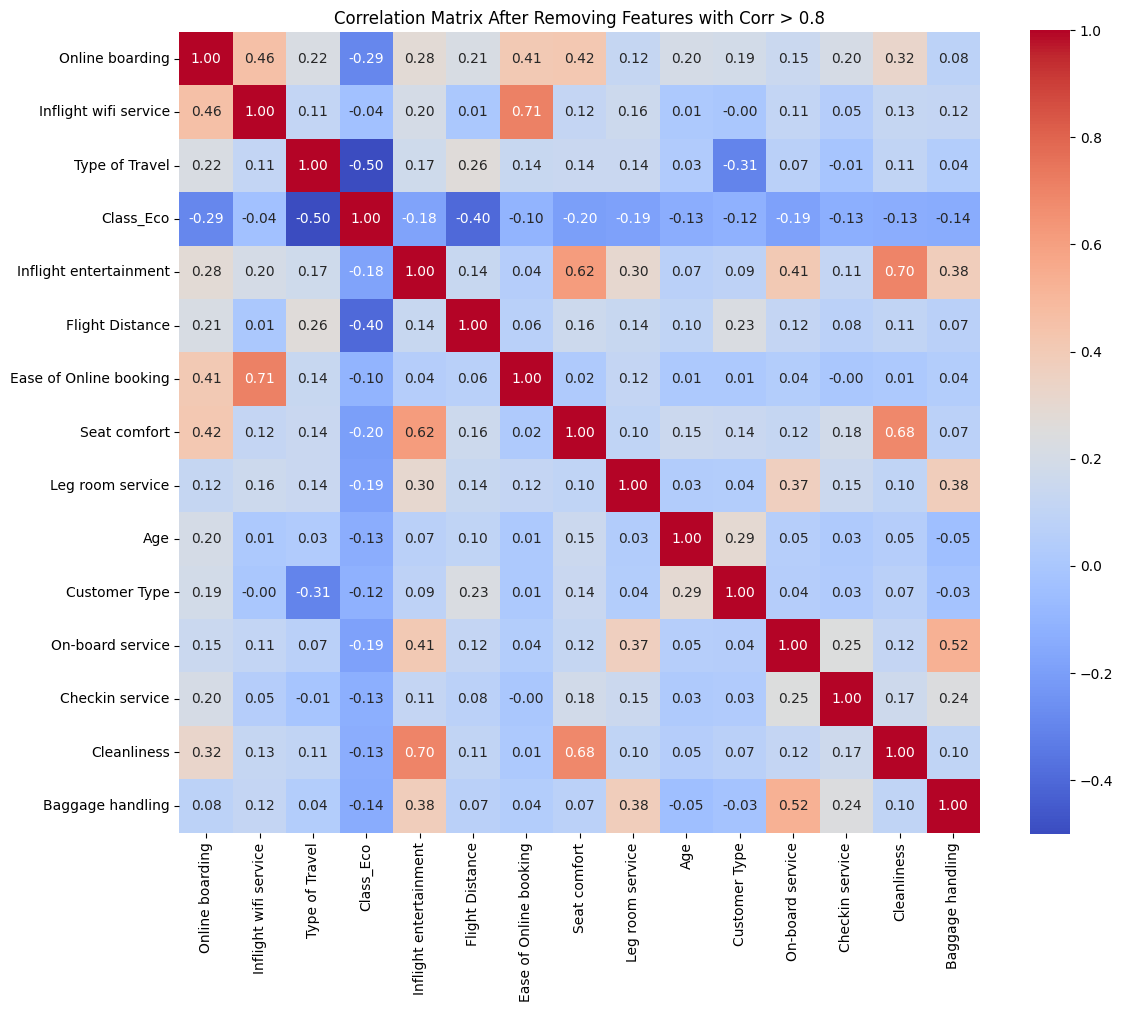

Removed features: []
Retained features: ['Online boarding', 'Inflight wifi service', 'Type of Travel', 'Class_Eco', 'Inflight entertainment', 'Flight Distance', 'Ease of Online booking', 'Seat comfort', 'Leg room service', 'Age', 'Customer Type', 'On-board service', 'Checkin service', 'Cleanliness', 'Baggage handling']


In [34]:
# Removing one of the features with correlation level more than 80%

# 1. Build the correlation matrix for the selected features
corr_matrix = X_filtered.corr().abs()

# 2. Extract the upper triangle of the matrix to avoid duplicate pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Identify features with correlation greater than 0.8
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# 4. Drop highly correlated features
X_filtered_nocorr = X_filtered.drop(columns=to_drop)

# 5. Final list of features
filtered_features_nocorr = X_filtered_nocorr.columns.tolist()

# 6. Visualize the correlation matrix after feature removal
plt.figure(figsize=(12, 10))
sns.heatmap(X_filtered_nocorr.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix After Removing Features with Corr > 0.8")
plt.tight_layout()
plt.show()
plt.savefig('Correlation Matrix After Removing Features with Corr less than 0.8.png')
plt.close()

# 7. Display removed and retained features
print("Removed features:", to_drop)
print("Retained features:", filtered_features_nocorr)


In [35]:
len(filtered_features_nocorr)

15

# Scallisation

In [36]:
# Regression is very sensitive to feature scale

# 1. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered_nocorr, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Standardization
scaler = StandardScaler()

# Fit the scaler on the training data and apply it to both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Check the shapes of the scaled datasets
print("Shapes of the scaled datasets:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)


Shapes of the scaled datasets:
X_train_scaled: (20780, 15)
X_test_scaled: (5196, 15)


# Class balancing

In [37]:
from collections import Counter

print("Class distribution:")
print(Counter(y))

Class distribution:
Counter({0: 14573, 1: 11403})


The disbalance of classess insignificant. However to minimise the impact on recall and precision in logistic regression nescessssary to use class_weight='balanced' - parameter

# Logistic regression

In [38]:
# 1. Train the logistic regression model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 2. Make predictions and print evaluation metrics
y_pred = lr_model.predict(X_test_scaled)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))




=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2915
           1       0.83      0.86      0.85      2281

    accuracy                           0.86      5196
   macro avg       0.86      0.86      0.86      5196
weighted avg       0.86      0.86      0.86      5196



=== Confusion Matrix ===
[[2523  392]
 [ 319 1962]]


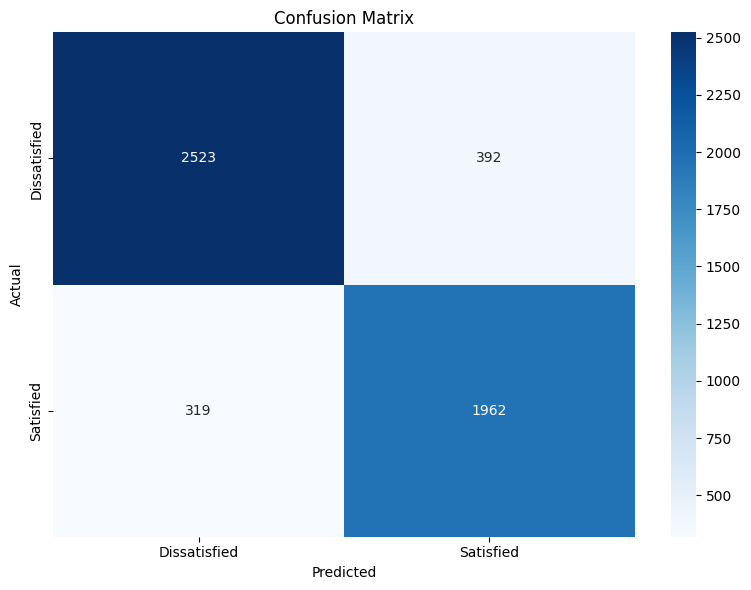

In [39]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
plt.savefig('Confusion Matrix.png')
plt.close()



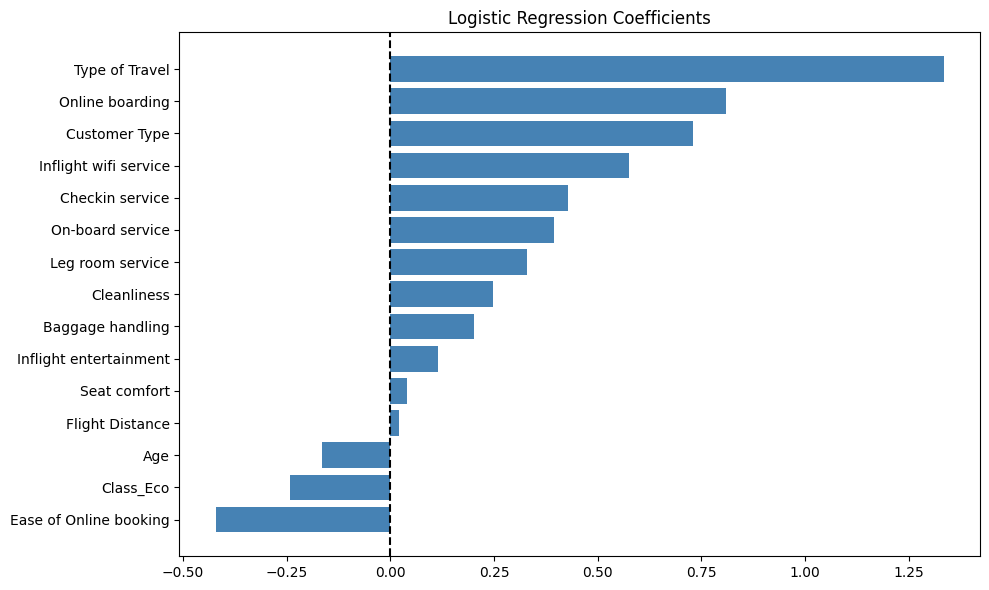

In [40]:
# 3. Visualize logistic regression coefficients
feature_names = X_train.columns.tolist()
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient')

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='steelblue')
plt.axvline(0, color='black', linestyle='--')
plt.title("Logistic Regression Coefficients")
plt.tight_layout()
plt.show()
plt.savefig('Logistic Regression Coefficients.png')
plt.close()


The logistic regression model shows which service factors most strongly influence customer satisfaction. Based on the model’s coefficients, we can make the following recommendations.

1. Invest in business traveler experience.
Customers traveling for business are significantly more satisfied. Offering flexible business fares and smoother processes for them can raise overall satisfaction levels.

2. Improve the online check-in process.
A simple and smooth online boarding experience has a major positive impact. This is one of the strongest predictors of satisfaction.

3. Strengthen customer loyalty programs.
Returning customers are much more likely to be satisfied. Enhancing loyalty benefits can retain valuable clients.

4. Upgrade inflight Wi-Fi.
Good onboard internet access has a strong positive effect on perceived service quality.

5. Focus on the check-in and onboard experience.
First impressions matter. Investing in staff training and improving face-to-face service will pay off.

On the other hand, the model also highlights negative influences.

Ease of online booking is a weakness.
Customers who struggle with booking are less likely to be satisfied. Improving the booking interface is crucial.

Passengers in economy class are less satisfied.
Even small improvements in comfort or affordable upgrades could increase satisfaction scores.

Older passengers are slightly less satisfied.
It's worth exploring how to adapt digital tools and service flows for this group.

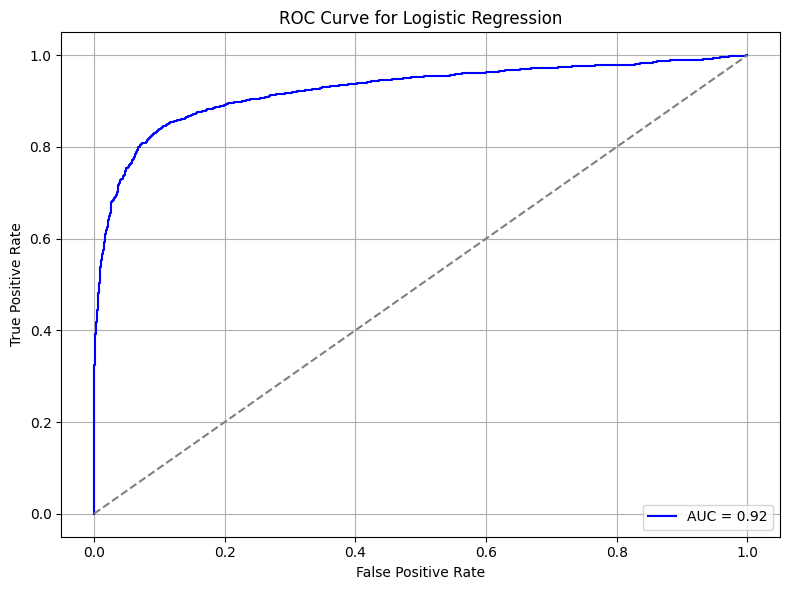

In [41]:
# 1. Get predicted probabilities for the positive class (satisfaction = 1)
y_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

# 2. Compute the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# 3. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('ROC Curve for Logistic Regression.png')
plt.close()

# The ROC curve shows how well the model separates satisfied and unsatisfied customers.

The curve rises sharply toward the top-left corner.

This indicates high sensitivity and low false positive rate.

The AUC (Area Under the Curve) is 0.93.

AUC above 0.9 means excellent classification performance.

The model is reliable in predicting customer satisfaction.

It performs much better than random guessing.